In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
dataset = pd.read_csv("C:/Users/Admin/Desktop/50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
dataset.shape

(50, 5)

In [7]:
x = dataset.iloc[:,:-1] 
y = dataset.iloc[:,-1]

In [8]:
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [9]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [10]:
x.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [11]:
one_hot_states = pd.get_dummies(x.State)

In [12]:
one_hot_states.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [13]:
x.drop(["State"], axis = 1, inplace = True)

In [14]:
x = pd.concat([x, one_hot_states], axis = 1)

In [15]:
x.head(5)

,R&D Spend,Administration,Marketing Spend,California,Florida,New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [18]:
linear_reg = LinearRegression()
linear_reg.fit(xtrain, ytrain)

LinearRegression()

In [19]:
linear_reg_predictions = linear_reg.predict(xtest)

In [20]:
print("R2 score:", r2_score(ytest, linear_reg_predictions))

R2 score: 0.9347068473282424


In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain,ytrain)
train_score=model.score(xtrain,ytrain)
test_score=model.score(xtest,ytest)
print('Train Score (R-Squared): ',train_score)
print('Test Score (R-Squared)',test_score)

Train Score (R-Squared):  0.9501847627493607
Test Score (R-Squared) 0.9347068473282424


In [24]:
from sklearn.metrics import mean_squared_error
train_predictions = model.predict(xtrain)
train_RMSE=mean_squared_error(ytrain,train_predictions)**0.5
test_predictions = model.predict(xtest)
test_RMSE=mean_squared_error(ytest,test_predictions)**0.5
print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)


Train RMSE :  9031.66661257897
Test RMSE :  9137.990152794953


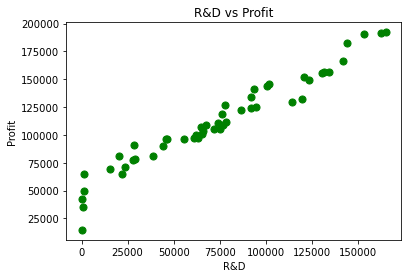

In [25]:
x1 = dataset.iloc[:, 0].values
y1 = dataset.iloc[:, -1].values
plt.scatter(x1,y1,color='Green',s=50)
plt.xlabel('R&D')
plt.ylabel('Profit')
plt.title('R&D vs Profit')
plt.show()

In [27]:
from sklearn.neural_network import MLPRegressor
nn_model = MLPRegressor(hidden_layer_sizes=(50))
nn_model.fit(xtrain,ytrain)
predict_digit=nn_model.predict(xtrain)
print(xtrain.shape)

(40, 6)


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
train_score=nn_model.score(xtrain,ytrain)
train_score=nn_model.score(xtest,ytest)
print('Train score(R-Squared):',train_score)
print('Test score(R-Squared):',test_score)

Train score(R-Squared): 0.7244297273498939
Test score(R-Squared): 0.9347068473282424


In [30]:
from sklearn.metrics import mean_squared_error
train_predictions = nn_model.predict(xtrain)
train_RMSE=mean_squared_error(ytrain,train_predictions)**0.5
test_predictions = nn_model.predict(xtest)
test_RMSE=mean_squared_error(ytest,test_predictions)**0.5
print('Train RMSE : ',train_RMSE)
print('Test RMSE : ',test_RMSE)


Train RMSE :  13730.714766094834
Test RMSE :  18772.972726070522
